# Lecture 14 - Ensemble Methods <a id="section0"/>

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_14-Ensemble_Methods/Lecture_14-Ensemble_Methods.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_14-Ensemble_Methods/Lecture_14-Ensemble_Methods.ipynb) 

<a id='top'></a>

- [14.1 Ensemble Methods](#14.1-ensemble-methods)
    - [14.1.1 Loading the Dataset](#14.1.1-loading-the-dataset)
- [14.2 Voting Ensemble](#14.2-voting-ensemble)
- [14.3 Bagging Ensemble](#14.3-bagging-ensemble)
- [14.4 Boosting Ensemble](#14.4-boosting-ensemble)
    - [14.4.1 Gradient Boosting Ensemble](#14.4.1-gradient-boosting-ensemble)
    - [14.4.2 Recent Gradient Boosting Methods: XGBoost, LightGBM, CatBoost](#14.4.2-recent-gradient-boosting-methods:-xgboost,-lightgbm,-catboost)
        - [14.4.2.1 XGBoost (Extreme Gradient Bossting)](#14.4.2.1-xgboost-(extreme-gradient-boosting))
        - [14.4.2.2 LightGBM (Light Gradient Boosting Machine)](#14.4.2.2-lightgbm-(light-gradient-boosting-machine))
        - [14.4.2.3 CatBoost (Categorical Boosting)](#14.4.2.3-catboost-(categorical-boosting))
    - [14.4.3 AdaBoost Ensemble](#14.4.3-adaboost-ensemble)
- [14.5 Stacking Ensemble](#14.5-stacking-ensemble)
- [References](#references)

## 14.1 Ensemble Methods <a id="14.1-ensemble-methods"/>

**Ensemble methods** combine the predictions of several other machine learning models, where by aggregating the results of the other models trained on the same dataset, ensembles can typically achieve better performance than any individual model. The individual models are often referred to as *base models* or *base learners*. 

When we introduced scikit-learn we mentioned that Random Forest is example of an ensemble model, since it combines a multitude of Decision Tree models to make predictions. 

Ensembles are one of the most powerful Machine Learning methods, and they are often used in the winning solutions in many Machine Learning competitions. 

Ensemble methods can be used for different learning tasks, including classification and regression. In this lecture, we will focus on ensemble classifiers.

Ensemble models are classified into four general groups:

* Voting Methods: make predictions based on majority voting of the individual models.
* Bagging Methods: train individual models on random subsets of the training data. Examples are Random Forests and Extra Trees.
* Boosting Methods: train individual models sequentially by learning from the mistakes. Examples are Gradient Boosting, XGBoost, LightGBM, CatBoost, and AdaBoost.
* Stacking Methods: train individual models, and use another model to aggregate their predictions. 

Most of the above ensemble methods are implemented in scikit-learn, except for XGBoost, LightGBM, and CatBoost.

### 14.1.1 Loading the Dataset <a id="14.1.1-loading-the-dataset"/>

To demonstrate the working principles of ensemble methods, we will use a dataset of electricity usage in New South Wales, Australia. In that market, electricity prices are not fixed and they are set every five minutes based on demand and supply of the market. 

We will train classifiers to predict whether the electricity price will go UP or DOWN the next time the price is set. 

The dataset contains 45,312 rows of data from May 7, 1996 to December 5, 1998. Each row of the dataset refers to a period of 30 minutes. It has information about the date and day of the week, and has other features related to electricity demand, schedule transfer, etc. 

Let's load the dataset `electricity_data` using pandas. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# Let's hide warning messages in the cells
import warnings
warnings.filterwarnings('ignore')

In [2]:
elec_df = pd.read_csv('data/electricity_data.csv')

Let's inspect the dataset. The `date` column does not show the actual date correctly, but we will use it as is, because the date has already been encoded into an adequate numerical format.

The `class` column contains the target labels for the classification task, where we would like to predict whether the electricity price will go UP or DOWN.

In [3]:
elec_df.head(10)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
5,0.0,2,0.106383,0.041161,0.207528,0.003467,0.422915,0.414912,DOWN
6,0.0,2,0.127660,0.041161,0.171824,0.003467,0.422915,0.414912,DOWN
7,0.0,2,0.148936,0.041161,0.152782,0.003467,0.422915,0.414912,DOWN
8,0.0,2,0.170213,0.041161,0.134930,0.003467,0.422915,0.414912,DOWN
9,0.0,2,0.191489,0.041161,0.140583,0.003467,0.422915,0.414912,DOWN


#### Exploratory Data Analysis

In [4]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


From the summary statistics below, we can tell that the maximum value in each column is 1 and the minimum is 0, meaning that the features are already normalized, so we don't need to apply data scaling. This does not apply to the `day` column that has values between 1 and 7 (i.e., Monday to Sunday), but we can leave that column as is. 

In [5]:
# summary statistics
elec_df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checking missing values
elec_df.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

Let's see how many UPs and DOWNs are in the `class` column.

<AxesSubplot:xlabel='class', ylabel='count'>

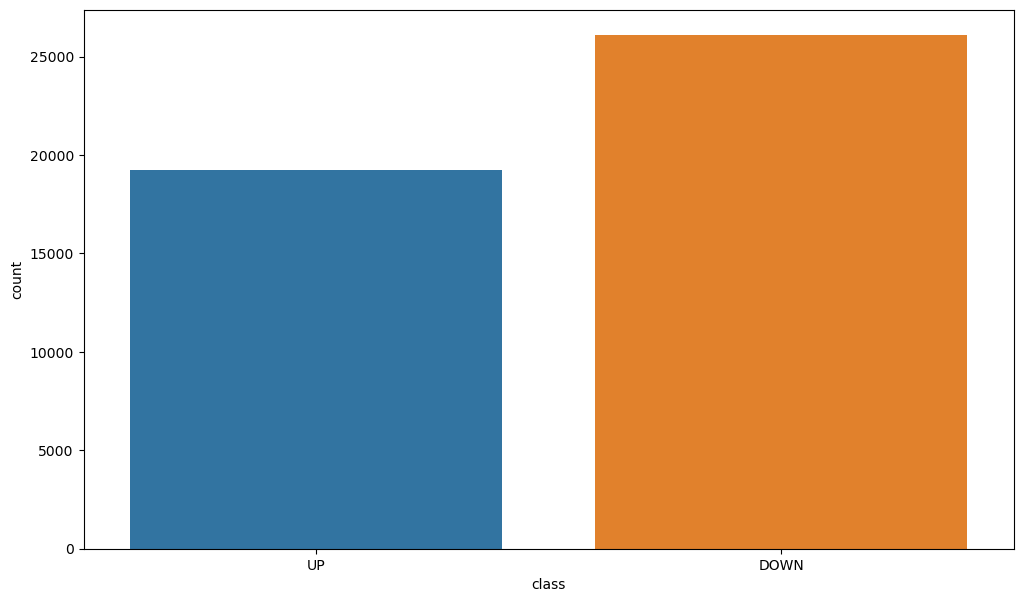

In [7]:
plt.figure(figsize=(12,7))
sns.countplot(data=elec_df, x='class')

Let's also inspect the UPs and DOWNs of the electricity price for each day of the week. 

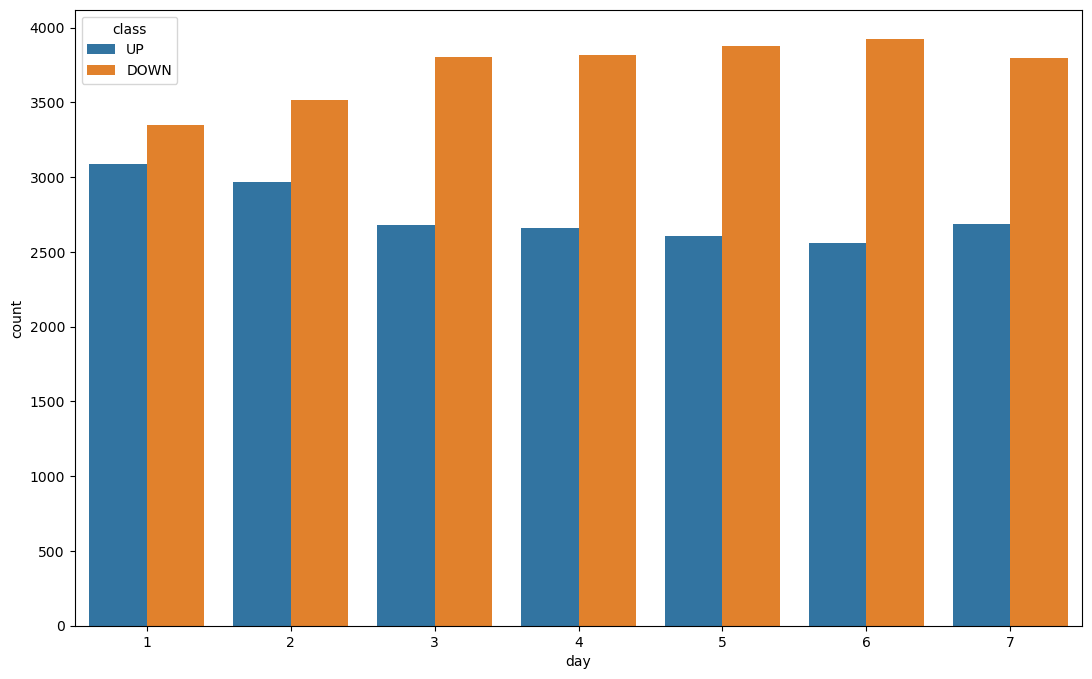

In [8]:
plt.figure(figsize=(13,8))
sns.countplot(data=elec_df, x='day', hue='class')
plt.show()

We can also plot all histograms of the numerical features, and quickly check the plots.

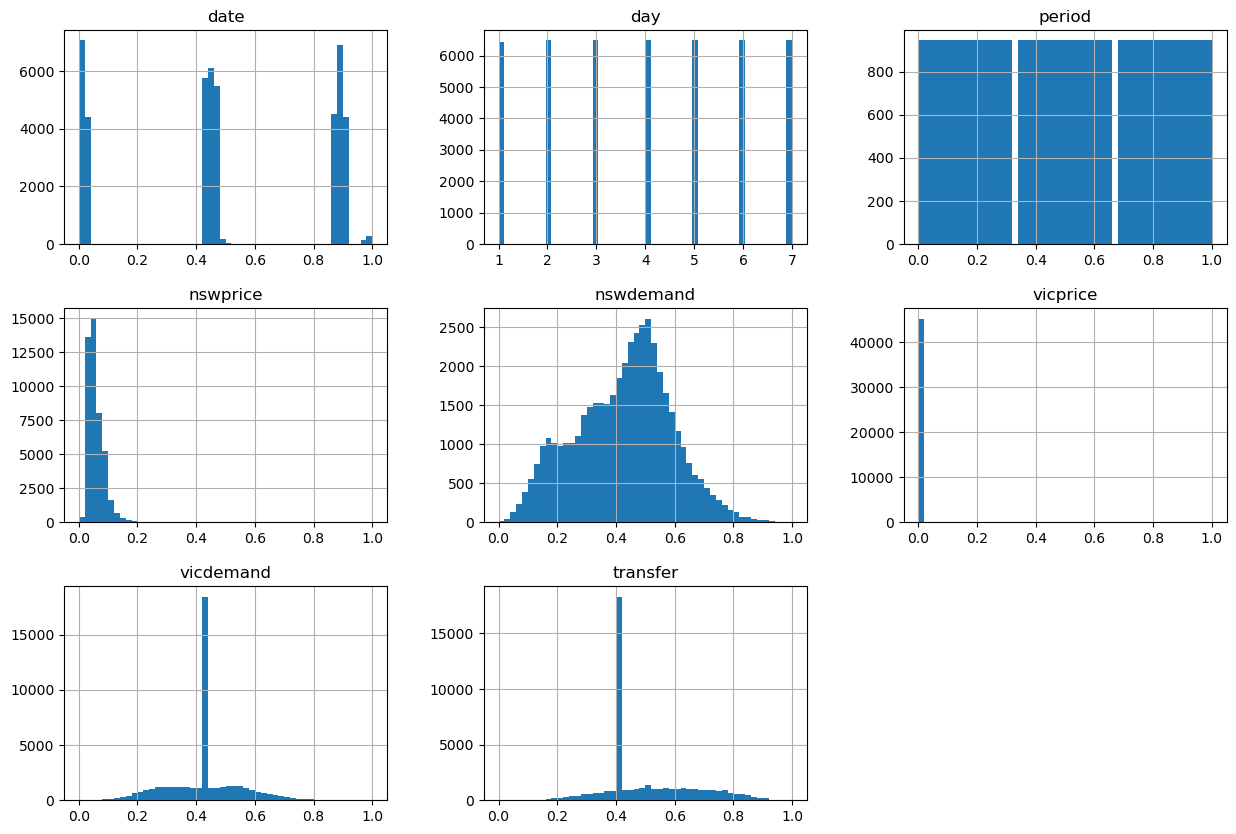

In [9]:
elec_df.hist(bins=50, figsize=(15,10))
plt.show()

#### Data Preprocessing 

We will assign the data to the variable `X` and the targets (the column `class`) to `y`.

Recall again from the lecture on Data Exploration and Preprocessing that if the dataset contained an `index` column it would be important to remove that column from the training dataset `X`, to avoid associating the target labels with the indices of the rows by the model. This dataset does not have an `index` column, therefore we don't need to worry about that. 

In [10]:
X = elec_df.drop('class', axis=1)
y = elec_df['class']

Since the target feature `class` is categorical, let's encode it to numerical values using Label Encoder. 

In [11]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [12]:
y

array([1, 1, 1, ..., 0, 1, 0])

And let's split the data into training and test sets. 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [14]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (33984, 8)
Training labels (33984,)
Testing data inputs (11328, 8)
Testing labels (11328,)


As we mentioned previously, the data values are already scaled to the range [0, 1], therefore we don't need to apply feature scaling. If that was not the case, we would have applied one of the Scaler functions in scikit-learn.

## 14.2 Voting Ensemble <a id="14.2-voting-ensemble"/>

**Voting ensemble** is the simplest ensemble technique, which aggregates the predictions of several individual classifiers and assigns the predicted class labels based on the majority votes of the single classifiers. 

For example, if we have a dataset with two classes A and B, and we train three classifiers. Then, for one particular test sample:

- Classifier 1 predicts class A
- Classifier 2 predicts class B
- Classifier 3 predicts class B
- Ensemble majority voting is: class B (2 votes), class A (1 vote). The prediction by the Ensemble Method is: class B.

Let's first train 3 classifiers on the training data for `electricity_data`, including: Logistic Regression, Support Vector Machines, and SGD. Afterward, we will apply a voting ensemble that uses their results to make predictions. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()

# train
lr_model.fit(X_train, y_train)

# evaluate
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print('Logistic Regression accuracy is {0:7.4f} %'.format(lr_acc*100))

Logistic Regression accuracy is 75.5120 %


In [16]:
from sklearn.svm import SVC

svm_model = SVC(random_state=1)

# train
svm_model.fit(X_train, y_train)

# evaluate
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print('SVM accuracy is {0:7.4f} %'.format(svm_acc*100))

SVM accuracy is 73.6935 %


In [17]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=1)

# train
sgd_model.fit(X_train, y_train)

# evaluate
sgd_preds = sgd_model.predict(X_test)
sgd_acc = accuracy_score(y_test, sgd_preds)
print('SGD accuracy is {0:7.4f} %'.format(sgd_acc*100))

SGD accuracy is 75.3708 %


In [18]:
print('Accuracy: Logistic Regression {0:7.4f}; SVM {1:7.4f}; SGD {2:7.4f}'.format(lr_acc*100, svm_acc*100, sgd_acc*100))

Accuracy: Logistic Regression 75.5120; SVM 73.6935; SGD 75.3708


In scikit-learn we will import `Voting Classifier` to aggregate the results of those 3 classifiers. In the cell below, the models are listed in the `estimators` argument of the `Voting Classifier`, and afterward the `Voting Classifier` model is fit on the training data. The voting argument `hard` means that the ensemble algorithm uses the predicted class labels for majority voting.

In [19]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    
    estimators=[('log_reg', lr_model),
                ('svc', svm_model),
                ('sgd', sgd_model)], 
    voting='hard')

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('svc', SVC(random_state=1)),
                             ('sgd', SGDClassifier(random_state=1))])

In [20]:
# evaluate
voting_preds = voting_classifier.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print('Voting Ensemble accuracy is {0:7.4f} %'.format(voting_acc*100))

Voting Ensemble accuracy is 75.6356 %


The Voting Ensemble achieved slightly higher accuracy than the three models. 

Beside `hard` voting, another alternative for the voting ensemble classifier is to change the argument to `voting='soft'`. In this case, the decision by the ensemble is made based on the average of the predicted class with the highest probabilities of all individual classifiers. 

Example of soft voting:

- Classifier 1 predicts class A with probability 90%, class B with probability 10%
- Classifier 2 predicts class A with probability 45%, class B with probability 55%
- Classifier 3 predicts class A with probability 45%, class B with probability 55%
- Ensemble probabilities: class A ((90% + 45% + 45%) / 3 = 60%), class B ((10% + 55% + 55%) / 3 = 40%). Prediction: class A.

Note in the above example that if hard voting based on the class labels was applied, the prediction would have been class B, because both Classifiers 2 and 3 predicted higher probabilities for class B.

Soft voting generally achieves better performance than hard voting, because it assigns higher weight to the predictions  with high confidence by the individual models.

In the cell below, to apply soft voting with SVC we need to change the argument `probability=True`, as well as this approach requires to modify the outputs of the SGD model, and instead of SGD we will use a k-Nearest Neighbors model.

In [21]:
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier()
svm_classifier = SVC(gamma="auto", probability=True)

voting_classifier_soft = VotingClassifier(
    
    estimators=[('log_reg', lr_model),
                ('svc', svm_classifier),
                 ('knn', knn_model)], 
     voting='soft')

voting_classifier_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [22]:
# evaluate
voting_preds = voting_classifier_soft.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print('Voting Ensemble accuracy is {0:7.4f} %'.format(voting_acc*100))

Voting Ensemble accuracy is 80.8086 %


Ensemble Methods are generally well performing. Even in the cases when the individual models are *weak learners* (which means that they predict slightly better than random guessing), ensemble learning can result in a *strong learner* (meaning that it has high prediction accuracy), as long as a large number of diverse individual models are used. 

In general, ensemble methods produce the best results when the individual models are independent of each other, e.g., they use different types of learning algorithms. This way, the individual models can produce diverse results, which can increase the chance that the ensembling will be more successful. Conversely, if the individual models use the same learning algorithm, they will probably make the same type of errors, which will reduce the accuracy when an ensemble method is used. 

Diversity in individual learners can be achieved by selecting models that use different learning algorithms, or by training models on different subsets of the training data, or different data features, etc. Also, many ensemble methods employ Decision Trees as individual models, where diversity can be achieved by varying the strategies for trees spliting, by varying the different hyperparameters, or by using the techniques based on data diversity, feature diversity, and other techniques. Specific approaches are explained text. 

## 14.3 Bagging Ensemble <a id="14.3-bagging-ensemble"/>

As we mentioned, one way to create diverse base models is to train them on different portions of the training data. Hence, instead of training different models on the same data and averaging their results with a Voting Ensemble, **Bagging Ensemble** method trains the base models on different subsets of the training data and aggregates the results. 

The term **bagging** is short for *bootstrap aggregating*, where bootstrapping refers to sampling subsets from the training data with replacement. In other words, the subsets of the training data used by different models can contain the same data points. When the subsets are sampled without replacement, it is called *pasting*.

The aggregation of the predictions by the individual models is typically based on the most frequent prediction, similar to hard voting. The individual models used with bagging are typically Decision Trees.

In scikit-learn we can import a Bagging Classifier, and fit it to the training data as any other model. Let's use bagging to train  Decision Trees on different subsets of the data and then average the predictions. In the cell below, `max_samples=0.5` means that each model will use a random subset containing 50% of the training data, and `max_features=0.5` means that each model will use a random subset of 50% of the input features. If bootstrap is `True` the training samples will be sampled with replacement, and if it is `False` there is no replacement (i.e., pasting). 

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=True
)

bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5)

In [24]:
# evaluate
bagging_preds = bagging_classifier.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)
print('Bagging Ensemble accuracy is {0:7.4f} %'.format(bagging_acc*100))

Bagging Ensemble accuracy is 84.1278 %


Bagging Ensembles often outperform Voting Ensembles, and they can decrease the overfitting of Decision Trees (which tend to overfit easily). As well as, Bagging Ensembles can be trained in parallel using different CPU cores, which can reduce the processing time.  

Random Forest can be considered a Bagging Ensemble with the `max_samples` set to 1, that is, it uses the entire training set to train the based learners.

## 14.4 Boosting Ensemble <a id="14.4-boosting-ensemble"/>

**Boosting Ensemble** trains the individual models sequentially, where each next model has access to the predictions of the previous models and attempts to improve the performance. The term *boosting* refers to incremental improvement by reducing the errors of the predecessors, in order to gradually improve the performance.

The most popular boosting ensembles are Gradient Boosting, XGBoost, LightGBM, CatBoost, and AdaBoost. 

### 14.4.1 Gradient Boosting Ensemble <a id="14.4.1-gradient-boosting-ensemble"/>

**Gradient Boosting Ensemble** fits the individual models sequentially, where each new model is fit to reduce the errors made by the previous model. The individual models in gradient boosting are Decision Trees. 

Specifically, the initial model is trained on the full dataset, and residual errors are obtained based on the difference between the predicted class of the model and the target label. The next model is trained by using the residual errors of the previous model as a target variable. These steps are repeated for each single model. Ideally, the residuals should become smaller as more individual models are trained, that is, the predictions by the models should better match the target labels. 

The residual errors represent the gradient of the loss function with respect to the predicted value. This is the reason why the method is called Gradient Boosting.

In scikit-learn, Gradient Boosting Classifier has hyperparameters related to the number of estimators i.e. Decision Trees (`n_estimators`), learning rate (`learning_rate`), maximum depth of the trees (`max_depth`), and others. The learning rate is typically set to values between 0.01 and 1, and it defines how quickly the models are updated. If the learning rate is too high, the models will be updated more quickly, which can cause overfitting.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_classifier = GradientBoostingClassifier(
                        n_estimators=500, 
                        learning_rate=0.8, 
                        random_state=42,
                        max_depth=2)

grad_boost_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=42)

In [26]:
# evaluate
gboost_preds = grad_boost_classifier.predict(X_test)
gboost_acc = accuracy_score(y_test, gboost_preds)
print('Gradient Boosting Ensemble accuracy is {0:7.4f} %'.format(gboost_acc*100))

Gradient Boosting Ensemble accuracy is 89.6893 %


### 14.4.2 Recent Gradient Boosting Methods: XGBoost, LightGBM, CatBoost <a id="14.4.2-recent-gradient-boosting-methods:-xgboost,-lightgbm,-catboost"/>

There are several optimized variants of Gradient Boosting Ensembles, which include XGBoost, LightGBM, and CatBoost. These three ensemble methods are among the most powerful and robust Machine Learning models for tabular data at present time. Their performance is often superior to other conventional ML methods, including the other ensemble methods. Also, they are very fast and scalable to large datasets. Because of these properties, XGBoost, LightGBM, and CatBoost are often the winning algorithms in many Kaggle competitions and other ML competitions where the datasets are in tabular format. 

Note that XGBoost, LightGBM, and Catboost are not implemented in Scikit-Learn, and they need to be installed as separate libraries, e.g., via:
    
    pip install xgboost catboost lightgbm
    
On the other hand, the API for working with these methods is the same as scikit-learn, and they use the `fit` and `predict` methods for model training and evaluation.  

#### 14.4.2.1 XGBoost (Extreme Gradient Boosting) <a id="14.4.2.1-xgboost-(extreme-gradient-boosting)"/>

**XGBoost** or **eXtreme Gradient Boosting Ensemble** introduces several modifications and optimizations in the original Gradient Boosting algorithm, which speed up the training process and improve the predictive performance. The main modifications in XGBoost encompass the introduction of L1 and L2 regularization terms into the objective function to reduce overfitting, and using a more efficient tree-building algorithm that relies on histogram-based methods and pruning techniques to optimize the tree splitting. XGBoost can also handle missing data, either by treating the data samples with missing values as a separate category, or it can apply techniques for filling in the missing values. Therefore, it can work without significant exploratory data analysis and preprocessing. 

As shown in the next cells, applying these variants of Gradient Boosting is as simple as fitting and evaluating other scikit-learn models. 

In [27]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
# evaluate
xgboost_preds = xgb_classifier.predict(X_test)
xgboost_acc = accuracy_score(y_test, xgboost_preds)
print('XGBoost Ensemble accuracy is {0:7.4f} %'.format(xgboost_acc*100))

XGBoost Ensemble accuracy is 90.1660 %


#### 14.4.2.2 LightGBM (Light Gradient Boosting Machine) <a id="14.4.2.2-lightgbm-(light-gradient-boosting-machine)"/>

**LightGBM** or **Light Gradient Boosting Machine** is another optimized version of Gradient Boosting Ensemble, which was developed by Microsoft. It uses a histogram-based approach for finding optimal splitting of the decision trees. As well as, LightGBM employs a leaf-wise tree growth strategy that can result in deeper trees compared to other ensemble algorithms. LightGBM focuses on efficiency and scalability of the approach.

In [29]:
import lightgbm
from lightgbm.sklearn import LGBMClassifier

lightgbm_classifier = LGBMClassifier()
lightgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 14443, number of negative: 19541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 33984, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424994 -> initscore=-0.302305
[LightGBM] [Info] Start training from score -0.302305


LGBMClassifier()

In [30]:
# evaluate
lightgbm_preds = lightgbm_classifier.predict(X_test)
lightgbm_acc = accuracy_score(y_test, lightgbm_preds)
print('XGBoost Ensemble accuracy is {0:7.4f} %'.format(lightgbm_acc*100))

XGBoost Ensemble accuracy is 87.9237 %


Optimizing the hyperparameters of ensemble methods can result in singificant improvement in performance. The next cells demonstrate this, by training another LightGBM model with different hyperparameters.

In [31]:
lightgbm_classifier_2 = LGBMClassifier(num_leaves=100, learning_rate=0.1, n_estimators=100)
lightgbm_classifier_2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 14443, number of negative: 19541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 33984, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424994 -> initscore=-0.302305
[LightGBM] [Info] Start training from score -0.302305


LGBMClassifier(num_leaves=100)

In [32]:
# evaluate
lightgbm_2_preds = lightgbm_classifier_2.predict(X_test)
lightgbm_2_acc = accuracy_score(y_test, lightgbm_2_preds)
print('XGBoost Ensemble accuracy is {0:7.4f} %'.format(lightgbm_2_acc*100))

XGBoost Ensemble accuracy is 91.6314 %


In general, tuning the hyperparameters of Gradient Boosting variants can be non-trivial, and requires to get familiar with the various hyperparameters and understand their impact on the performance. 

#### 14.4.2.3 CatBoost (Categorical Boosting) <a id="14.4.2.3-catboost-(categorical-boosting)"/>

**CatBoost** or **Categorical Boosting** is specifically designed for handling categorical features, and it can operate directly on data with categorical features, without the requirement for applying ordinal or label encoding or other preprocessing techniques. It uses an ordered gradient boosting technique for direct processing of categorical features. Other modifications in CatBoost include the use of specialized regularization techniques (such as depth regularization and feature permutation-based regularization) and implementation of specialized symmetric trees structure to prevent overfitting.

Similar to XGBoost, CatBoost has also support for dealing with missing data values, which simplifies the data preprocessing. 

In [33]:
import catboost
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(verbose=False)
catboost_classifier.fit(X_train, y_train)

In [34]:
# evaluate
catboost_preds = catboost_classifier.predict(X_test)
catboost_acc = accuracy_score(y_test, catboost_preds)
print('XGBoost Ensemble accuracy is {0:7.4f} %'.format(catboost_acc*100))

XGBoost Ensemble accuracy is 89.2479 %


The decision on which variant of Gradient Boosting to select depends on the specific characteristics of a dataset, the available computational resources, the type of features in the dataset, and other factors. All three methods are high-performing, fast, and robust, and they are continuously developed and improved.

### 14.4.3 AdaBoost Ensemble <a id="14.4.3-adaboost-ensemble"/>

**AdaBoost Ensemble** has similarities to Gradient Boosting, however, instead of minimizing the residual error of the sequential models, it assigns weights to the training data instances based on the difficulty to be classified. The main idea of AdaBoost is to focus the individual models on the training instances that are difficult to classify. AdaBoost is short of *adaptive boosting*. 

AdaBoost begins by training a base model (which by default is a Decision Tree) on the full training dataset. After that, higher weights are assigned to the data instances that were misclassified by the previous model. Therefore, the second model will put more attention on correctly predicting the class of the misclassified data instances. By training many models sequentially, the algorithm will try harder to predict the difficult data instances. 

The aggregated prediction by all single models is done by averaging the predictions and using weights for each model based on their accuracy on the training set. 

The main parameters in the AdaBoost Classifier are the type of base estimators and the number of estimators. 

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), 
    n_estimators=300,
    learning_rate=0.5
)

adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300)

In [36]:
# evaluate
adaboost_preds = adaboost_classifier.predict(X_test)
adaboost_acc = accuracy_score(y_test, adaboost_preds)
print('AdaBoost Ensemble accuracy is {0:7.4f} %'.format(adaboost_acc*100))

AdaBoost Ensemble accuracy is 89.9718 %


## 14.5 Stacking Ensemble <a id="14.5-stacking-ensemble"/>

**Stacking Ensemble** is also referred to as *stacked generalization*, where instead of using hard or soft voting for aggregating the results from multiple models, another model (referred to as a *blender* or *meta-learner*) is trained to perform the aggregation. 

In the example below, we train two base estimators: SVM classifier and a Random Forest classifier. Afterward, we use Logistic Regression model as a final estimator, which is trained by using the predictions by the two base estimators as inputs. The final estimator aggregates the predictions of the individual models and outputs the final predictions. 

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator = LogisticRegression()

stack_classifier = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rand',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [38]:
# evaluate
stack_preds = stack_classifier.predict(X_test)
stack_acc = accuracy_score(y_test, stack_preds)
print('Stacking Ensemble accuracy is {0:7.4f} %'.format(stack_acc*100))

Stacking Ensemble accuracy is 90.2189 %


In conclusion, Ensemble Methods are among the best performing Machine Learning models. Whereas they may not be competitive with Neural Networks for datasets containing images, text, audio, or other data formats, for datasets with tabular data Ensemble Methods may outperform Neural Network-based approaches. In addition, Ensemble Methods can achieve good performance even without significant hyperparameter finetuning, in comparison to Neural Networks that typically require more finetuning. As well as, Ensemble Method can outperform Neural Networks for tasks with smaller dataset sizes, are robust to outliers, and can handle imbalanced datasets.

## References <a id="references"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Hands-on Machine Learning with Scikit-learn, Keras & TensorFlow, Aurelien Geron, available at: [https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb](https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb). 
3. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 


[BACK TO TOP](#top)